In [ ]:
!pip install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 7.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=f6b1e258f1b7f080598348158415e176ccfabfe3dbccaf4b904728c33467c8d8
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# CELL 2
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cmpe-257-lab-2-part-2

 94% 108M/115M [00:00<00:00, 91.9MB/s] 
100% 115M/115M [00:00<00:00, 131MB/s] 


In [ ]:
from zipfile import ZipFile
file_name = "cmpe-257-lab-2-part-2.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done.')

Done.


In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, Activation
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import tensorflow as tf
from sklearn import preprocessing
from keras.optimizers import SGD

In [ ]:
import cv2

train_image_list = []

for i in range(1,40001):
  image = cv2.imread(f'/content/train/train/{i}.png')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  train_image_list.append(image)
train_image_list = np.array(train_image_list)            

In [ ]:
len(train_image_list)

40000

In [ ]:
test_image_list = []

for i in range(40001,50001):
  image = cv2.imread(f'/content/test/test/{i}.png')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  test_image_list.append(image)
test_image_list = np.array(test_image_list)  

In [ ]:
len(test_image_list)

10000

In [ ]:
trainlabel_df = pd.read_csv("/content/trainLabels.csv")
trainlabel_df

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
39995,39996,airplane
39996,39997,automobile
39997,39998,frog
39998,39999,bird


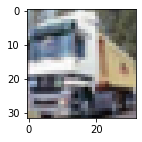

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(train_image_list[1].astype(int))

In [ ]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

trainlabel_df['label']= label_encoder.fit_transform(trainlabel_df['label'])

In [ ]:
trainlabel_df

,id,label
0,1,6
1,2,9
2,3,9
3,4,4
4,5,1
...,...,...
39995,39996,0
39996,39997,1
39997,39998,6
39998,39999,2


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
141/141 [==============================] - 61s 178ms/step - loss: 10.7705 - accuracy: 0.2848 - val_loss: 9.7264 - val_accuracy: 0.4290
Epoch 2/200
141/141 [==============================] - 23s 163ms/step - loss: 7.8204 - accuracy: 0.4907 - val_loss: 6.1751 - val_accuracy: 0.5142
Epoch 3/200
141/141 [==============================] - 23s 162ms/step - loss: 5.4652 - accuracy: 0.5815 - val_loss: 4.1418 - val_accuracy: 0.6143
Epoch 4/200
141/141 [==============================] - 23s 161ms/step - loss: 3.8638 - accuracy: 0.6205 - val_loss: 3.6668 - val_accuracy: 0.5480
Epoch 5/200
141/141 [==============================] - 23s 161ms/step - loss: 2.8109 - accuracy: 0.6627 - val_loss: 2.2535 - val_accuracy: 0.7103
Epoch 6/200
141/141 [==============================] - 23s 161ms/step - loss: 2.2383 - accuracy: 0.6804 - val_loss: 2.0415 - val_accuracy: 0.6773
Epoch 7/200
141/141 [==============================] - 23s 162ms/step - loss: 1.9246 - accuracy: 0.6867 - val_loss: 1.7889 

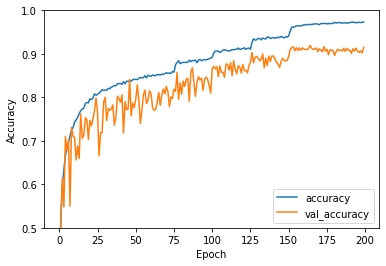

In [ ]:
from keras.callbacks import LearningRateScheduler

X = train_image_list
y = to_categorical(np.array(trainlabel_df['label']))


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=15)

X_train = X_train/255.0
X_val = X_val/255.0

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0007
    if epoch > 100:
        lrate = 0.0005
    if epoch > 125:
        lrate = 0.0003
    if epoch > 150:
        lrate = 0.0001
    return lrate

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='elu',kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
    
model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=False
    )
datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 256), epochs=200, validation_data=(X_val, y_val),callbacks=[LearningRateScheduler(lr_schedule)])

scores = model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)

[7.8743478e-06 7.5032466e-07 1.1652263e-06 5.3905546e-07 8.4868841e-09
 4.4853373e-08 1.9020037e-07 6.8154362e-09 9.9998808e-01 1.3477293e-06]
10000


,0
0,40001
1,40002
2,40003
3,40004
4,40005
...,...
9995,49996
9996,49997
9997,49998
9998,49999


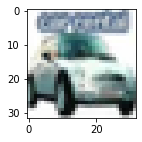

In [ ]:
test_image_list = test_image_list/255.0
predictions = model.predict(test_image_list)
print(predictions[1])
print(len(predictions))
predictions_list = []
for i in range(len(predictions)):
  predictions_list.append(np.argmax(predictions[i]))
predictions_list = label_encoder.inverse_transform(predictions_list)
plt.figure(figsize = (15,2))
plt.imshow((test_image_list[0]*255).astype(int))
labels_id = []
for i in range(40001,50001):
  labels_id.append(i)
labels_id_df = pd.DataFrame(labels_id)
labels_id_df  

In [ ]:
y_pred_df = pd.DataFrame(predictions_list) 
final_labels_df = [labels_id_df[0],y_pred_df[0]]
headers = ['id','label']
final_prediction_df = pd.concat(final_labels_df, axis=1, keys=headers)
final_prediction_df

,id,label
0,40001,automobile
1,40002,ship
2,40003,dog
3,40004,automobile
4,40005,dog
...,...,...
9995,49996,airplane
9996,49997,frog
9997,49998,truck
9998,49999,automobile
